<a href="https://colab.research.google.com/github/lazarovps/Data-Science/blob/main/Marketing_campaign_(segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação das bibliotecas necessárias

In [1]:
#Importação das bibliotecas
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
base = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##Manipulação e limpeza de dados

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
base['idade'] = 2022 - base['Year_Birth']

(array([189., 506., 685., 541., 300.,  16.,   0.,   0.,   0.,   3.]),
 array([ 26. ,  36.3,  46.6,  56.9,  67.2,  77.5,  87.8,  98.1, 108.4,
        118.7, 129. ]),
 <a list of 10 Patch objects>)

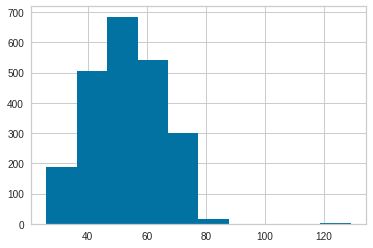

In [6]:
plt.hist(x = 'idade', data = base, bins = 10)

In [7]:
base['idade'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: idade, dtype: float64

In [8]:
base = base[base['idade']<120]

In [9]:
base['Education'].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [10]:
base['educacao'] = base['Education'].replace({'Basic':'ensino_basico','2n Cycle':'ensino_basico','Graduation':'graduacao','Master':'pos_graduacao','PhD':'pos_graduacao'})

In [11]:
base['ensino_basico'] = np.where(base['educacao']=='ensino_basico',1,0)
base['graduacao'] = np.where(base.educacao=='graduacao',1,0)

In [12]:
base['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [13]:
#Criando a variável 'casado', onde 'Married' e 'Together' iguais a 1 e o restante igual a 0 
base['casado'] = base['Marital_Status'].replace({'Married':1,'Together':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'YOLO':0,'Absurd':0})

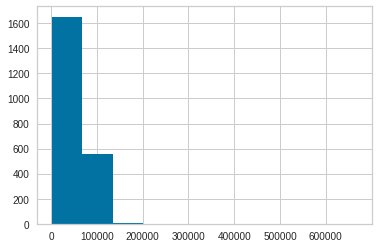

In [14]:
plt.hist(x = 'Income', data = base)
plt.show()

In [15]:
base['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [16]:
base = base[base['Income']<600000]

In [17]:
#Somando crianças e adolescentes
base['filhos'] = base['Kidhome'] + base['Teenhome']

In [18]:
base['filhos'].value_counts()

1    1114
0     632
2     416
3      50
Name: filhos, dtype: int64

In [19]:
base['Dt_Customer'].value_counts()

31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
13-03-2014     1
18-11-2012     1
15-04-2014     1
12-06-2014     1
30-09-2012     1
Name: Dt_Customer, Length: 662, dtype: int64

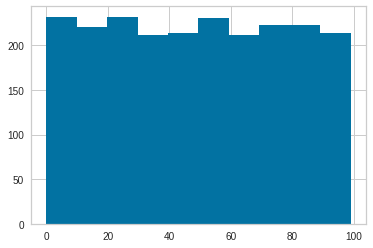

In [20]:
plt.hist(x = 'Recency', data = base)
plt.show()

(array([1541.,  272.,  192.,   99.,   78.,   26.,    0.,    0.,    0.,
           4.]),
 array([   0. ,  172.5,  345. ,  517.5,  690. ,  862.5, 1035. , 1207.5,
        1380. , 1552.5, 1725. ]),
 <a list of 10 Patch objects>)

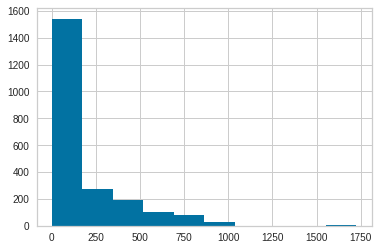

In [21]:
plt.hist(x = 'MntMeatProducts', data = base)

In [22]:
base['MntMeatProducts'].describe()

count    2212.000000
mean      167.029837
std       224.254493
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [23]:
base = base[base['MntMeatProducts'] < 1700]

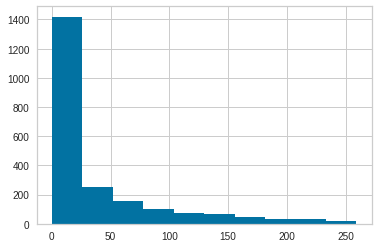

In [24]:
plt.hist(x = 'MntFishProducts', data = base)
plt.show()

In [25]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2210 non-null   int64  
 1   Year_Birth           2210 non-null   int64  
 2   Education            2210 non-null   object 
 3   Marital_Status       2210 non-null   object 
 4   Income               2210 non-null   float64
 5   Kidhome              2210 non-null   int64  
 6   Teenhome             2210 non-null   int64  
 7   Dt_Customer          2210 non-null   object 
 8   Recency              2210 non-null   int64  
 9   MntWines             2210 non-null   int64  
 10  MntFruits            2210 non-null   int64  
 11  MntMeatProducts      2210 non-null   int64  
 12  MntFishProducts      2210 non-null   int64  
 13  MntSweetProducts     2210 non-null   int64  
 14  MntGoldProds         2210 non-null   int64  
 15  NumDealsPurchases    2210 non-null   i

In [26]:
base['gasto_total'] = base.iloc[:,9] + base.iloc[:,10] + base.iloc[:,11] + base.iloc[:,12] + base.iloc[:,13] + base.iloc[:,14]

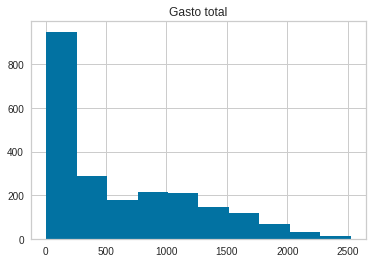

In [27]:
plt.hist(x = 'gasto_total', data = base)
plt.title('Gasto total')
plt.show()

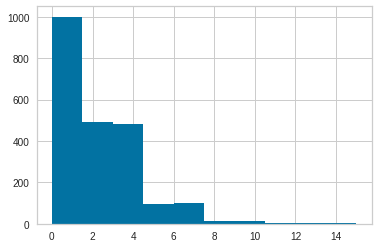

In [28]:
plt.hist(x = 'NumDealsPurchases', data = base)
plt.show()

In [29]:
base['AcceptedCmp1'].value_counts()

0    2068
1     142
Name: AcceptedCmp1, dtype: int64

In [30]:
base['AcceptedCmp2'].value_counts()

0    2180
1      30
Name: AcceptedCmp2, dtype: int64

In [31]:
base['AcceptedCmp3'].value_counts()

0    2047
1     163
Name: AcceptedCmp3, dtype: int64

In [32]:
base['AcceptedCmp4'].value_counts()

0    2046
1     164
Name: AcceptedCmp4, dtype: int64

In [33]:
base['AcceptedCmp5'].value_counts()

0    2049
1     161
Name: AcceptedCmp5, dtype: int64

In [34]:
base['Response'].value_counts()

0    1877
1     333
Name: Response, dtype: int64

(array([760., 828., 457., 118.,  44.,   0.,   0.,   0.,   1.,   2.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

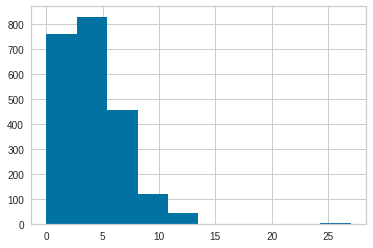

In [35]:
plt.hist(x = 'NumWebPurchases', data = base)

In [36]:
base['NumWebPurchases'].describe()

count    2210.000000
mean        4.091855
std         2.740666
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

In [37]:
base = base[base['NumWebPurchases']<25]

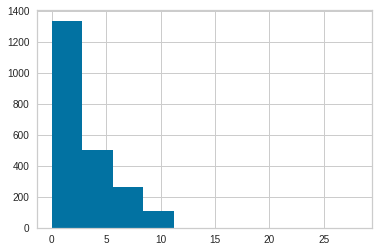

In [38]:
plt.hist(x = 'NumCatalogPurchases', data = base)
plt.show()

In [39]:
base['NumCatalogPurchases'].describe()

count    2208.000000
mean        2.651721
std         2.828041
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [40]:
base = base[base['NumCatalogPurchases']<25]

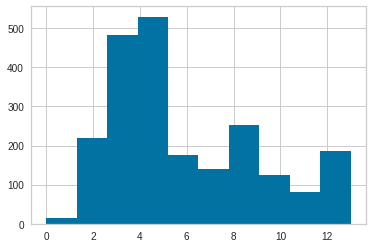

In [41]:
plt.hist(x = 'NumStorePurchases', data = base)
plt.show()

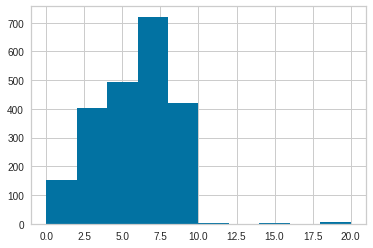

In [42]:
plt.hist(x = 'NumWebVisitsMonth', data = base)
plt.show()

In [43]:
base['NumWebVisitsMonth'].describe()

count    2207.000000
mean        5.331672
std         2.418688
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [44]:
base = base[base['NumWebVisitsMonth'] < 12]

In [45]:
base['Complain'].value_counts()

0    2178
1      20
Name: Complain, dtype: int64

In [46]:
base['Z_CostContact'].value_counts()

3    2198
Name: Z_CostContact, dtype: int64

In [47]:
base['Z_Revenue'].value_counts()

11    2198
Name: Z_Revenue, dtype: int64

In [48]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2198 non-null   int64  
 1   Year_Birth           2198 non-null   int64  
 2   Education            2198 non-null   object 
 3   Marital_Status       2198 non-null   object 
 4   Income               2198 non-null   float64
 5   Kidhome              2198 non-null   int64  
 6   Teenhome             2198 non-null   int64  
 7   Dt_Customer          2198 non-null   object 
 8   Recency              2198 non-null   int64  
 9   MntWines             2198 non-null   int64  
 10  MntFruits            2198 non-null   int64  
 11  MntMeatProducts      2198 non-null   int64  
 12  MntFishProducts      2198 non-null   int64  
 13  MntSweetProducts     2198 non-null   int64  
 14  MntGoldProds         2198 non-null   int64  
 15  NumDealsPurchases    2198 non-null   i

In [49]:
base.drop(['ID','Year_Birth','Education','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status','Kidhome','Teenhome','Dt_Customer','Education','educacao','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response','Z_CostContact','Z_Revenue',], axis = 1, inplace = True)

In [50]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2198 non-null   float64
 1   Recency              2198 non-null   int64  
 2   NumDealsPurchases    2198 non-null   int64  
 3   NumWebPurchases      2198 non-null   int64  
 4   NumCatalogPurchases  2198 non-null   int64  
 5   NumStorePurchases    2198 non-null   int64  
 6   NumWebVisitsMonth    2198 non-null   int64  
 7   idade                2198 non-null   int64  
 8   ensino_basico        2198 non-null   int64  
 9   graduacao            2198 non-null   int64  
 10  casado               2198 non-null   int64  
 11  filhos               2198 non-null   int64  
 12  gasto_total          2198 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 240.4 KB


In [51]:
base = base.rename(columns = {'Income':'renda','Recency':'recencia','NumDealsPurchases':'compras_desconto','NumWebPurchases':'compras_site','NumCatalogPurchases':'compras_catalogo','NumStorePurchases':'compras_loja','NumWebVisitsMonth':'num_visitas'})

##Modelagem de dados

In [52]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   renda             2198 non-null   float64
 1   recencia          2198 non-null   int64  
 2   compras_desconto  2198 non-null   int64  
 3   compras_site      2198 non-null   int64  
 4   compras_catalogo  2198 non-null   int64  
 5   compras_loja      2198 non-null   int64  
 6   num_visitas       2198 non-null   int64  
 7   idade             2198 non-null   int64  
 8   ensino_basico     2198 non-null   int64  
 9   graduacao         2198 non-null   int64  
 10  casado            2198 non-null   int64  
 11  filhos            2198 non-null   int64  
 12  gasto_total       2198 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 240.4 KB


In [53]:
scaler = StandardScaler()

In [54]:
base_sca = pd.DataFrame(scaler.fit_transform(base), columns = base.columns)

In [55]:
base_sca

,renda,recencia,compras_desconto,compras_site,compras_catalogo,compras_loja,num_visitas,idade,ensino_basico,graduacao,casado,filhos,gasto_total
0,0.288385,0.307100,0.380424,1.473444,2.646585,-0.570409,0.749694,1.018225,-0.359856,0.992747,-1.350997,-1.267528,1.676277
1,-0.272047,-0.384221,-0.166809,-1.163877,-0.594392,-1.189703,-0.123327,1.274776,-0.359856,0.992747,-1.350997,1.402359,-0.965567
2,0.928695,-0.799013,-0.714043,1.473444,-0.234284,1.287471,-0.559838,0.334091,-0.359856,0.992747,0.740194,-1.267528,0.278924
3,-1.208063,-0.799013,-0.166809,-0.787117,-0.954501,-0.570409,0.313183,-1.290727,-0.359856,0.992747,0.740194,0.067415,-0.922367
4,0.295751,1.551477,1.474891,0.343164,0.125825,0.048884,-0.123327,-1.034177,-0.359856,-1.007306,0.740194,0.067415,-0.309260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.434979,-0.107693,-0.166809,1.850204,0.125825,-0.570409,-0.123327,0.163058,-0.359856,0.992747,0.740194,0.067415,1.217693
2194,0.567603,0.237968,2.569358,1.473444,-0.234284,-0.260763,0.749694,1.958910,-0.359856,-1.007306,0.740194,2.737302,-0.272706
2195,0.233406,1.447779,-0.714043,-0.787117,0.125825,2.216412,0.313183,-1.034177,-0.359856,0.992747,-1.350997,-1.267528,1.051539
2196,0.816172,-1.421202,-0.166809,0.719924,0.846042,1.287471,-0.996348,1.103742,-0.359856,-1.007306,0.740194,0.067415,0.390247


In [56]:
pca = PCA()

In [57]:
pca.fit_transform(base_sca)

array([[ 2.42728603,  0.91708599, -0.59414534, ..., -0.33506325,
         0.30319364,  0.07241855],
       [-1.72518472,  0.05773393, -1.47515826, ..., -0.02392177,
        -0.01740342, -0.04107666],
       [ 1.99365675, -0.01058496, -0.62036696, ...,  0.68290339,
        -0.03380255, -0.30359936],
       ...,
       [ 1.53184936, -0.94985887, -0.98400704, ..., -1.5553654 ,
        -0.57593097, -0.08062589],
       [ 1.99444152,  0.49752678,  0.71413815, ..., -0.05758252,
         0.61557796, -0.08738513],
       [-1.43872386,  1.10199107,  0.36965973, ..., -0.27440314,
        -0.23684832, -0.2965001 ]])

In [58]:
pca.explained_variance_ratio_.cumsum()

array([0.3245675 , 0.45782268, 0.56165435, 0.64166819, 0.71845495,
       0.79510839, 0.84513571, 0.89018091, 0.92317673, 0.95371994,
       0.97490735, 0.99044959, 1.        ])

In [59]:
pca = PCA(n_components = 6)

In [60]:
base_pca = pca.fit_transform(base_sca)

In [61]:
#Método do cotovelo para a seleção da quantidade de cluters

In [62]:
cot = KElbowVisualizer(KMeans(), k = 10)

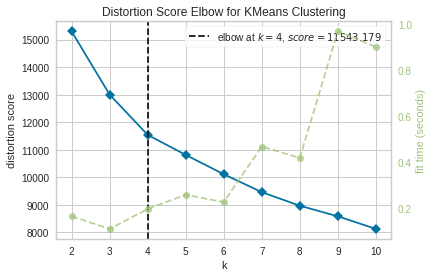

In [63]:
cot.fit(base_pca)
cot.show()

In [64]:
kmeans = KMeans(n_clusters = 4)

In [65]:
cluster_pred = kmeans.fit_predict(base_pca)

In [66]:
base['cluster'] = cluster_pred

In [67]:
base.head()

,renda,recencia,compras_desconto,compras_site,compras_catalogo,compras_loja,num_visitas,idade,ensino_basico,graduacao,casado,filhos,gasto_total,cluster
0,58138.0,58,3,8,10,4,7,65,0,1,0,0,1617,1
1,46344.0,38,2,1,1,2,5,68,0,1,0,2,27,0
2,71613.0,26,1,8,2,10,4,57,0,1,1,0,776,1
3,26646.0,26,2,2,0,4,6,38,0,1,1,1,53,0
4,58293.0,94,5,5,3,6,5,41,0,0,1,1,422,3


In [68]:
base['cluster'] = base['cluster'].replace({0:'A',1:'B',2:'C',3:'D'})

In [69]:
base = base.sort_values('cluster')

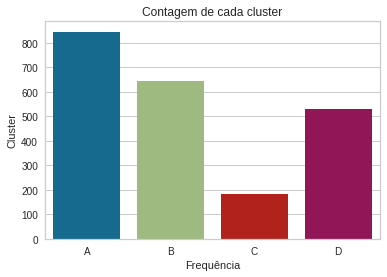

In [80]:
sns.countplot(x = 'cluster', data = base)
plt.xlabel('Frequência')
plt.ylabel('Cluster')
plt.title('Contagem de cada cluster')
plt.show()

In [81]:
base['cluster'].value_counts(normalize=True)

A    0.384440
B    0.292084
D    0.240673
C    0.082803
Name: cluster, dtype: float64

In [71]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 2239 to 630
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   renda             2198 non-null   float64
 1   recencia          2198 non-null   int64  
 2   compras_desconto  2198 non-null   int64  
 3   compras_site      2198 non-null   int64  
 4   compras_catalogo  2198 non-null   int64  
 5   compras_loja      2198 non-null   int64  
 6   num_visitas       2198 non-null   int64  
 7   idade             2198 non-null   int64  
 8   ensino_basico     2198 non-null   int64  
 9   graduacao         2198 non-null   int64  
 10  casado            2198 non-null   int64  
 11  filhos            2198 non-null   int64  
 12  gasto_total       2198 non-null   int64  
 13  cluster           2198 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 337.6+ KB


In [72]:
med = base.groupby('cluster').mean()

In [73]:
cont = base['cluster'].value_counts()

In [74]:
med

,renda,recencia,compras_desconto,compras_site,compras_catalogo,compras_loja,num_visitas,idade,ensino_basico,graduacao,casado,filhos,gasto_total
cluster,,,,,,,,,,,,,
A,35962.531361,49.242604,1.926627,2.140828,0.578698,3.271006,6.305325,51.424852,0.000000,0.597633,0.639053,1.260355,100.177515
B,75328.141745,49.197819,1.230530,5.038941,5.707165,8.465732,2.794393,54.249221,0.077882,0.537383,0.627726,0.255452,1300.616822
C,30739.412088,49.714286,2.071429,2.263736,0.675824,3.489011,6.401099,46.219780,1.000000,0.000000,0.686813,1.005495,133.829670
D,56907.863894,48.606805,4.293006,6.676749,2.930057,7.574669,6.283554,56.720227,0.037807,0.485822,0.665406,1.275992,742.275992


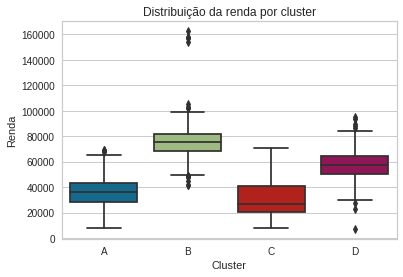

In [75]:
sns.boxplot(x = 'cluster', y = 'renda', data = base)
plt.xlabel('Cluster')
plt.ylabel('Renda')
plt.title('Distribuição da renda por cluster')
plt.show()

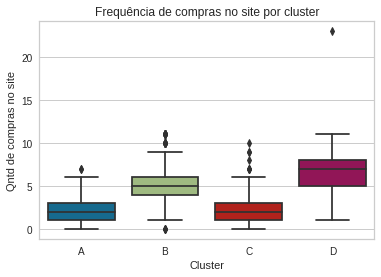

In [76]:
sns.boxplot(x = 'cluster', y = 'compras_site', data = base)
plt.xlabel('Cluster')
plt.ylabel('Qntd de compras no site')
plt.title('Frequência de compras no site por cluster')
plt.show()

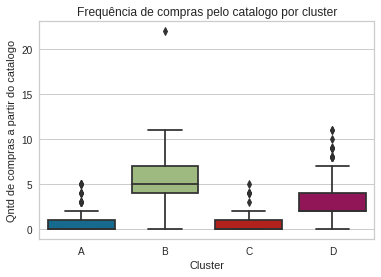

In [77]:
sns.boxplot(x = 'cluster', y = 'compras_catalogo', data = base)
plt.xlabel('Cluster')
plt.ylabel('Qntd de compras a partir do catalogo')
plt.title('Frequência de compras pelo catalogo por cluster')
plt.show()

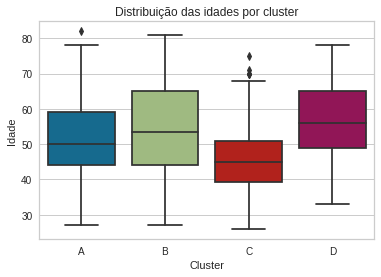

In [78]:
sns.boxplot(x = 'cluster', y = 'idade', data = base)
plt.xlabel('Cluster')
plt.ylabel('Idade')
plt.title('Distribuição das idades por cluster')
plt.show()

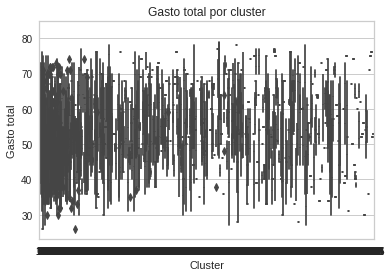

In [79]:
sns.boxplot(x = 'gasto_total', y = 'idade', data = base)
plt.xlabel('Cluster')
plt.ylabel('Gasto total')
plt.title('Gasto total por cluster')
plt.show()

Com base nos resultados, podemos deduzir algumas características dos clusters/grupos:


Cluster/Grupo A:

- Grupo mais frequente
- Grupo que menos compra pelo catálogo, site e loja
- Renda média de US$ 35.000
- Todos frequentaram ao menos a graduação
- Um dos grupos que mais tem filhos
- Gasto total baixo 

Cluster/Grupo B:

- Grupo de maior renda média
- Menos reativos à descontos
- Compram bastante pelo site, catálogo e loja
- Fazem menos visitas ao site
- O número médio de filhos é baixo (a cada 4 pessoas, 1 tem filho(s), em média)
- Maior nível de gasto


Cluster/Grupo C:

- Menor nível de renda
- Grupo menos frequente
- Maior número de visitas ao site
- Grupo mais novo
- Todos do grupo possuem no máximo o ensino médio completo
- Baixo nível de gasto


Cluster/Grupo D:

- Renda média/alta (US$ 56.000 em média)
- Grupo bem reativo à todas as plataformas de vendas
- Grupo mais velho
- Grupo que possui mais filhos, em média
- Alto nível de gasto

